In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('PS_2025.04.12_10.20.43.csv', comment = "#") #creating a dataframe by reading the downloaded data from NASA's exoplanet archive
df_cleaned = df.drop(['hd_name', 'hip_name'], axis = 1) #drop column 4 and 5, as they were causing errors w/ mixed data types

C:\Users\glump\AppData\Local\Temp\ipykernel_23984\1664505033.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PS_2025.04.12_10.20.43.csv', comment = "#") #creating a dataframe by reading the downloaded data from NASA's exoplanet archive


In [3]:
df_cleaned 

,rowid,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,TIC 72437047,Gaia DR2 3946945413106333696,0,2,1,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,TIC 72437047,Gaia DR2 3946945413106333696,0,2,1,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,TIC 230061010,Gaia DR2 1696798367260229376,0,1,1,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38185,38186,ups And d,ups And,d,TIC 189576919,Gaia DR2 348020448377061376,1,2,3,0,...,2019-01-28,2011-01,2019-01-31,5.0,1.0,10.0,1.0,0.0,0.0,0.0
38186,38187,ups Leo b,ups Leo,b,TIC 49430557,Gaia DR2 3794167001116433152,1,1,1,0,...,2022-01-10,2021-12,2022-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38187,38188,xi Aql b,xi Aql,b,TIC 375464367,Gaia DR2 4298361114750843904,0,1,1,0,...,2014-07-23,2011-08,2014-07-23,1.0,1.0,1.0,0.0,0.0,0.0,0.0
38188,38189,xi Aql b,xi Aql,b,TIC 375464367,Gaia DR2 4298361114750843904,0,1,1,0,...,2014-05-14,2008-06,2014-05-14,1.0,1.0,1.0,0.0,0.0,0.0,0.0


Comparisons to make:
1. Relationships between:
   - Transit depth and radius
   - Semimajor axis and orbital period
   - Semimajor axis (~ orbital radius and equilibrium temperature)

In [9]:
#I will start by isolating the transit depth and planet radius columns
td_v_pr = df_cleaned[['pl_trandep', 'pl_rade']]
td_v_pr = td_v_pr.dropna() #Dropped the NaN's
td_v_pr

,pl_trandep,pl_rade
106,0.038467,2.023112
113,0.041000,2.080000
121,0.038000,2.000000
170,0.287229,4.026926
172,0.237900,3.956770
...,...,...
38045,1.473500,17.818200
38047,0.959700,15.527600
38051,0.909000,15.389957
38138,0.032100,1.997790


In [11]:
td_v_pr = td_v_pr.drop_duplicates() #drop the duplicates
td_v_pr

,pl_trandep,pl_rade
106,0.038467,2.023112
113,0.041000,2.080000
121,0.038000,2.000000
170,0.287229,4.026926
172,0.237900,3.956770
...,...,...
38045,1.473500,17.818200
38047,0.959700,15.527600
38051,0.909000,15.389957
38138,0.032100,1.997790


In [13]:
#Filtering outliers:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = td_v_pr['pl_trandep'].quantile(0.25)
Q3 = td_v_pr['pl_trandep'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
td_v_pr = td_v_pr[(td_v_pr['pl_trandep'] >= lower_bound) & (td_v_pr['pl_trandep'] <= upper_bound)]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1r = td_v_pr['pl_rade'].quantile(0.25)
Q3r = td_v_pr['pl_rade'].quantile(0.75)
IQRr = Q3r - Q1r

# Define outlier boundaries
lower_bound = Q1r - 1.5 * IQRr
upper_bound = Q3r + 1.5 * IQRr

# Filter out outliers
td_v_pr = td_v_pr[(td_v_pr['pl_rade'] >= lower_bound) & (td_v_pr['pl_rade'] <= upper_bound)]


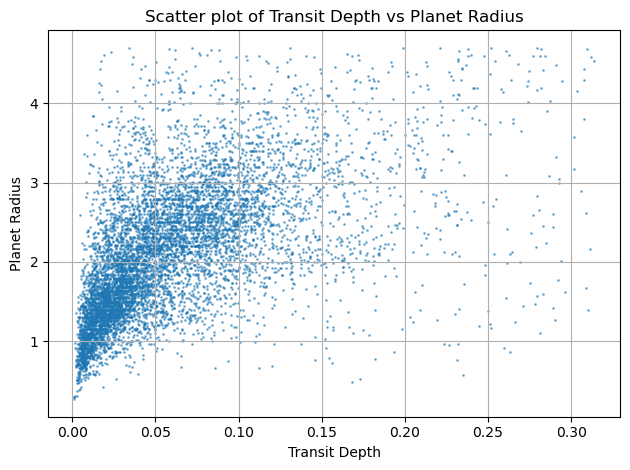

In [15]:
plt.figure()
plt.scatter(td_v_pr['pl_trandep'], td_v_pr['pl_rade'], alpha = 0.5, s = 1)
plt.title('Scatter plot of Transit Depth vs Planet Radius')
plt.xlabel('Transit Depth')
plt.ylabel('Planet Radius')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
from numpy import log as ln
import math
from scipy.optimize import curve_fit
def ln_model(x, a, b, c):
    return a*np.log(np.maximum(x-b, 1e-10)) + c

x = td_v_pr['pl_trandep']
y = td_v_pr['pl_rade']

p0 = [2, 0, 0]
params, pcov = curve_fit(ln_model, x, y, p0 = p0)
params, pcov


(array([ 6.46005034e-01, -2.31392672e-03,  4.10931209e+00]),
 array([[ 3.19757437e-04, -1.20377004e-05,  7.41631856e-04],
        [-1.20377004e-05,  5.80161639e-07, -2.53383048e-05],
        [ 7.41631856e-04, -2.53383048e-05,  1.82226520e-03]]))

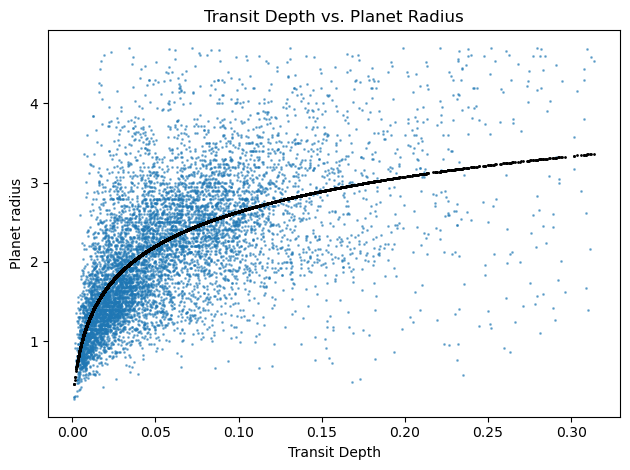

In [19]:
fitted_y_data = ln_model(td_v_pr['pl_trandep'], *params)
# Residuals (observed - fitted)
residuals = td_v_pr['pl_rade'] - fitted_y_data
yerr = np.std(residuals)
plt.figure()
plt.scatter(td_v_pr['pl_trandep'], td_v_pr['pl_rade'], alpha = 0.5, s =1)
#plt.errorbar(td_v_pr['pl_trandep'], fitted_y_data, yerr = yerr, fmt = 'o', ecolor = 'red', capsize = 0.1, elinewidth = 0.01)
plt.scatter(td_v_pr['pl_trandep'], fitted_y_data, color = 'black', s = 1)
plt.title('Transit Depth vs. Planet Radius')
plt.xlabel('Transit Depth')
plt.ylabel('Planet radius')
plt.tight_layout()
plt.show()

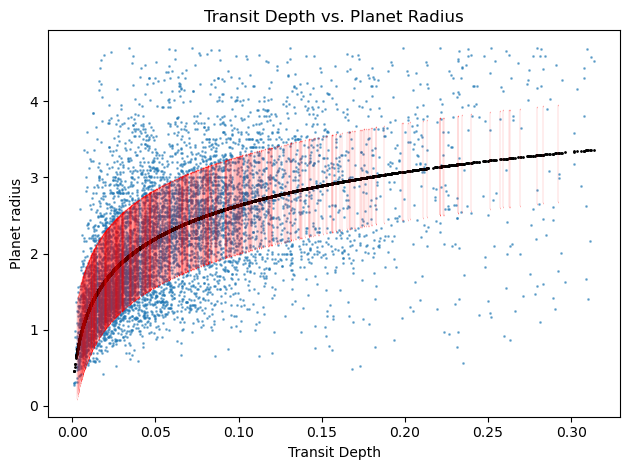

In [25]:
fitted_y_data = ln_model(td_v_pr['pl_trandep'], *params)
# Residuals (observed - fitted)
residuals = td_v_pr['pl_rade'] - fitted_y_data
yerr = np.std(residuals)
step = 10
x_subset = td_v_pr['pl_trandep'][::step]
y_subset = fitted_y_data[::step]
plt.figure()
plt.scatter(td_v_pr['pl_trandep'], td_v_pr['pl_rade'], alpha = 0.5, s =1)
plt.errorbar(x_subset, y_subset, yerr = yerr, fmt = 'none', ecolor = 'red', capsize = 0.1, elinewidth = 0.1)
plt.scatter(td_v_pr['pl_trandep'], fitted_y_data, color = 'black', s = 1)
plt.title('Transit Depth vs. Planet Radius')
plt.xlabel('Transit Depth')
plt.ylabel('Planet radius')
plt.tight_layout()
plt.show()

In [27]:
#Graph 2: Distance from star and orbital period
d_v_op = df_cleaned[['pl_orbsmax', 'pl_orbper']]
d_v_op = d_v_op.dropna() #Dropped the NaN's
d_v_op = d_v_op.drop_duplicates() # Drop duplicates
d_v_op

,pl_orbsmax,pl_orbper
0,1.29000,326.03000
2,1.17800,323.21000
3,1.53000,516.21997
4,1.54000,516.22000
6,0.83000,185.84000
...,...,...
38184,2.57000,1319.00000
38185,2.51329,1276.46000
38186,1.18000,385.20000
38188,0.68000,136.75000


In [29]:
#Filtering outliers:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = d_v_op['pl_orbsmax'].quantile(0.25)
Q3 = d_v_op['pl_orbsmax'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
d_v_op = d_v_op[(d_v_op['pl_orbsmax'] >= lower_bound) & (d_v_op['pl_orbsmax'] <= upper_bound)]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1r = d_v_op['pl_orbper'].quantile(0.25)
Q3r = d_v_op['pl_orbper'].quantile(0.75)
IQRr = Q3r - Q1r

# Define outlier boundaries
lower_bound = Q1r - 1.5 * IQRr
upper_bound = Q3r + 1.5 * IQRr

# Filter out outliers
d_v_op = d_v_op[(d_v_op['pl_orbper'] >= lower_bound) & (d_v_op['pl_orbper'] <= upper_bound)]

d_v_op

,pl_orbsmax,pl_orbper
31,0.190000,30.350600
32,0.194000,30.330000
71,0.052000,4.230770
72,0.052350,4.230797
73,0.052700,4.230785
...,...,...
38169,0.059000,4.617120
38170,0.059400,4.617111
38171,0.059222,4.617033
38172,0.059000,4.617080


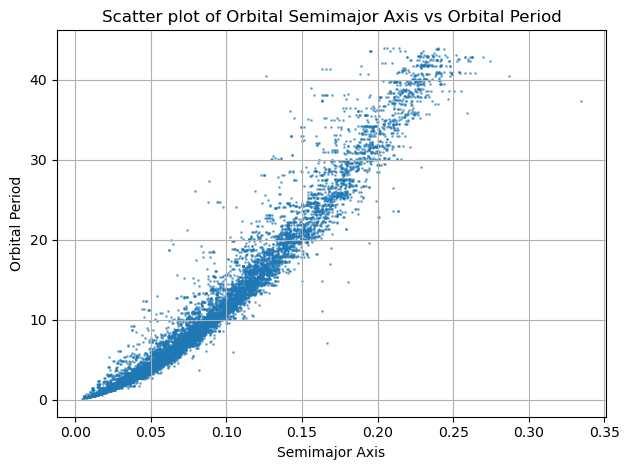

In [31]:
plt.figure()
plt.scatter(d_v_op['pl_orbsmax'], d_v_op['pl_orbper'], alpha = 0.5, s = 1)
plt.title('Scatter plot of Orbital Semimajor Axis vs Orbital Period')
plt.xlabel('Semimajor Axis')
plt.ylabel('Orbital Period')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
def exp_growth(x, a, b, c):
    return a*(b**(x*c))

x = d_v_op['pl_orbsmax']
y = d_v_op['pl_orbper']

p0 = [1, 1, 1]

params, pcov = curve_fit(exp_growth, x, y, p0=p0)
params, pcov

(array([ 3.93748092, 59.59135813,  2.54803367]),
 array([[ 5.35900527e-04, -5.47251185e+04,  5.72465818e+02],
        [-5.47251185e+04,  4.00620441e+14, -4.19079178e+12],
        [ 5.72465818e+02, -4.19079178e+12,  4.38388410e+10]]))

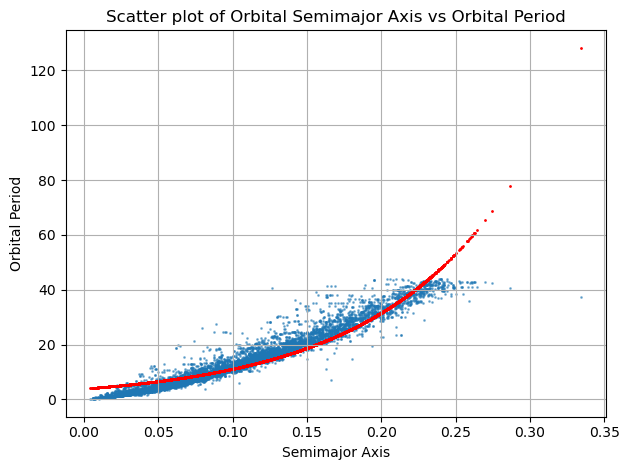

In [35]:
fitted_y_data = exp_growth(d_v_op['pl_orbsmax'], *params)
plt.figure()
plt.scatter(d_v_op['pl_orbsmax'], d_v_op['pl_orbper'], alpha = 0.5, s = 1)
plt.scatter(d_v_op['pl_orbsmax'], fitted_y_data, color = 'red', s = 1)
plt.title('Scatter plot of Orbital Semimajor Axis vs Orbital Period')
plt.xlabel('Semimajor Axis')
plt.ylabel('Orbital Period')
plt.grid(True)
plt.tight_layout()
plt.show()

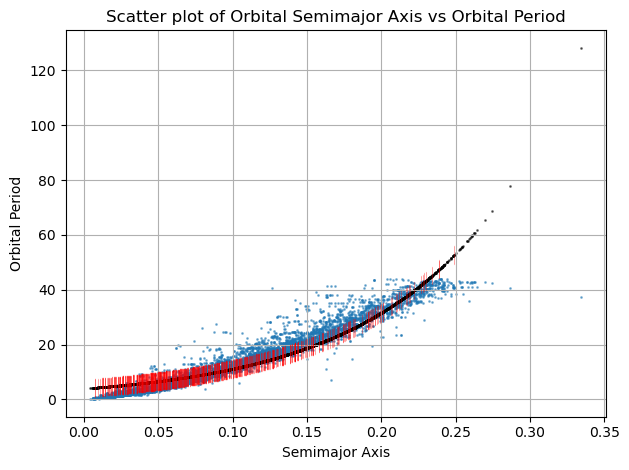

In [37]:
#with error bars
fitted_y_data = exp_growth(d_v_op['pl_orbsmax'], *params)
#Residuals
residuals = d_v_op['pl_orbper'] - fitted_y_data
yerr = np.std(residuals)
plt.figure()
plt.scatter(d_v_op['pl_orbsmax'], d_v_op['pl_orbper'], alpha = 0.5, s = 1)
plt.errorbar(d_v_op['pl_orbsmax'], fitted_y_data, yerr = yerr, fmt = 'none', ecolor = 'red', capsize = 0.1, elinewidth = .5, errorevery = 20, alpha = 0.5)
plt.scatter(d_v_op['pl_orbsmax'], fitted_y_data, color = 'black', alpha = 0.5, s = 1)
plt.title('Scatter plot of Orbital Semimajor Axis vs Orbital Period')
plt.xlabel('Semimajor Axis')
plt.ylabel('Orbital Period')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
#Graph 3: Semimajor axis and equilibrium temperature
orbsmax_v_eqt = df_cleaned[['pl_orbsmax', 'pl_eqt']]
orbsmax_v_eqt = orbsmax_v_eqt.dropna() #Dropped the NaN's
orbsmax_v_eqt = orbsmax_v_eqt.drop_duplicates() # Drop duplicates
orbsmax_v_eqt

,pl_orbsmax,pl_eqt
27,330.00000,1700.0
29,330.00000,1800.0
35,118.00000,1450.0
41,572.00000,2369.0
43,266.00000,2677.0
...,...,...
38110,61.00000,1680.0
38141,0.06702,1147.0
38142,0.06839,1169.8
38149,0.21960,614.0


In [41]:
#Filtering outliers:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = orbsmax_v_eqt['pl_orbsmax'].quantile(0.25)
Q3 = orbsmax_v_eqt['pl_orbsmax'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
orbsmax_v_eqt = orbsmax_v_eqt[(orbsmax_v_eqt['pl_orbsmax'] >= lower_bound) & (orbsmax_v_eqt['pl_orbsmax'] <= upper_bound)]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1r = orbsmax_v_eqt['pl_eqt'].quantile(0.25)
Q3r = orbsmax_v_eqt['pl_eqt'].quantile(0.75)
IQRr = Q3r - Q1r

# Define outlier boundaries
lower_bound = Q1r - 1.5 * IQRr
upper_bound = Q3r + 1.5 * IQRr

# Filter out outliers
orbsmax_v_eqt = orbsmax_v_eqt[(orbsmax_v_eqt['pl_eqt'] >= lower_bound) & (orbsmax_v_eqt['pl_eqt'] <= upper_bound)]

orbsmax_v_eqt

,pl_orbsmax,pl_eqt
77,0.11300,700.0
167,0.06450,593.0
172,0.06490,600.0
175,0.11080,459.0
176,0.11010,454.0
...,...,...
38058,0.02156,410.3
38060,0.02851,356.7
38141,0.06702,1147.0
38142,0.06839,1169.8


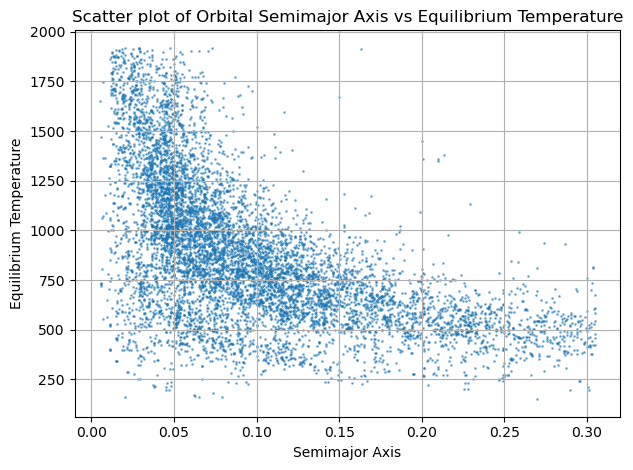

In [43]:
plt.figure()
plt.scatter(orbsmax_v_eqt['pl_orbsmax'], orbsmax_v_eqt['pl_eqt'], alpha = 0.5, s = 1)
plt.title('Scatter plot of Orbital Semimajor Axis vs Equilibrium Temperature')
plt.xlabel('Semimajor Axis')
plt.ylabel('Equilibrium Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
import math
def exp_decay(x, a, b):
    return a*np.exp(-b * x)

x = orbsmax_v_eqt['pl_orbsmax']
y = orbsmax_v_eqt['pl_eqt']

p0 = [2000, 20]

params, pcov = curve_fit(exp_decay, x, y, p0=p0)
params, pcov

(array([1344.56760362,    4.74322183]),
 array([[7.01873441e+01, 5.33178928e-01],
        [5.33178928e-01, 5.76935640e-03]]))

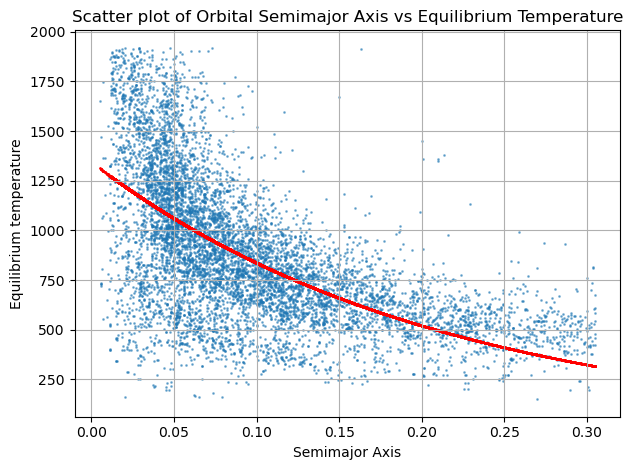

In [47]:
fitted_y_data = exp_decay(orbsmax_v_eqt['pl_orbsmax'], *params)
plt.figure()
plt.scatter(orbsmax_v_eqt['pl_orbsmax'], orbsmax_v_eqt['pl_eqt'], alpha = 0.5, s = 1)
plt.scatter(orbsmax_v_eqt['pl_orbsmax'], fitted_y_data, color = 'red', s = 1)
plt.title('Scatter plot of Orbital Semimajor Axis vs Equilibrium Temperature')
plt.xlabel('Semimajor Axis')
plt.ylabel('Equilibrium temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

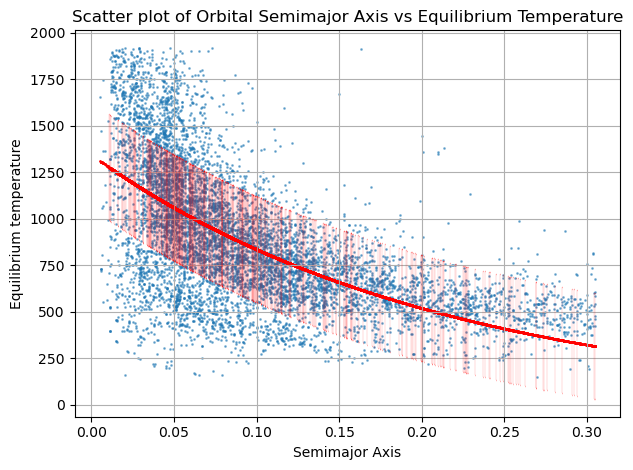

In [49]:
#with errorbars
fitted_y_data = exp_decay(orbsmax_v_eqt['pl_orbsmax'], *params)
residuals = orbsmax_v_eqt['pl_eqt'] - fitted_y_data
yerr = np.std(residuals)
plt.figure()
plt.scatter(orbsmax_v_eqt['pl_orbsmax'], orbsmax_v_eqt['pl_eqt'], alpha = 0.5, s = 1)
plt.errorbar(orbsmax_v_eqt['pl_orbsmax'], fitted_y_data, yerr = yerr, fmt = 'none', ecolor = 'red', capsize = 0.1, elinewidth = 0.1, errorevery = 20)
plt.scatter(orbsmax_v_eqt['pl_orbsmax'], fitted_y_data, color = 'red', s = 1)
plt.title('Scatter plot of Orbital Semimajor Axis vs Equilibrium Temperature')
plt.xlabel('Semimajor Axis')
plt.ylabel('Equilibrium temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
x = np.linspace(.1, 10, 100)
#(array([ 6.46005034e-01, -2.31392672e-03,  4.10931209e+00])
true_a, true_b, true_c = .646, -.0023139, 4.109
noise = np.random.normal(scale=.6, size=x.shape)  # Random noise with a standard deviation of 0.1
y = ln_model(x, true_a, true_b, true_c) + noise
popt, pcov = curve_fit(ln_model, x, y, p0 = [true_a, true_b, true_c])
estimated_a, estimated_b, estimated_c = popt
print(f"Estimated Parameters: a={estimated_a}, b={estimated_b}, c={estimated_c}")

Estimated Parameters: a=0.5063907080517234, b=0.09606166268288101, c=4.312418146387942


In [53]:
y_pred = ln_model(x, *popt)
residuals = y - y_pred
print(f"Residuals: {residuals}")
std_dev = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_dev}")

Residuals: [-0.01658092  0.26269447  0.58455245 -0.31268677 -0.29775406  0.49486143
  0.42788969  0.73258932  0.07405758 -0.0632259   0.41001785 -1.01017335
  0.16860406 -0.76195008 -0.64049703  0.10590418 -0.42804843 -1.04729896
 -0.66641301  0.15228765  0.1384637  -0.08103662 -0.64803314 -0.05023814
  0.38009331 -0.41405053 -0.5485677  -0.16204239  0.74162742  0.64010663
  0.28282953 -0.43951633 -0.30304164  0.63450599  0.84999877  0.22468677
 -0.05033595  1.29435232  0.15643514  0.38485259 -0.45841937 -0.28298682
 -0.00860862 -1.32926459 -0.01604187 -0.02014419 -0.44779422  0.32162631
 -0.25403384  0.0496605  -0.0516484  -0.36210642 -0.73302403 -0.48981555
 -0.1522716  -0.20004432  0.17212371 -0.06545924 -0.63580603 -0.00294857
  1.3901603   0.59498546  0.71038055  0.51788452 -0.2229548   0.01908447
 -0.64610565  1.07484354  0.88258188  1.02967548  0.07449159 -0.38423376
 -0.65216881  0.03983167 -0.39842163 -0.53469925 -0.30782108  1.70535271
 -0.04768703  0.64695081 -0.47145959 -0.

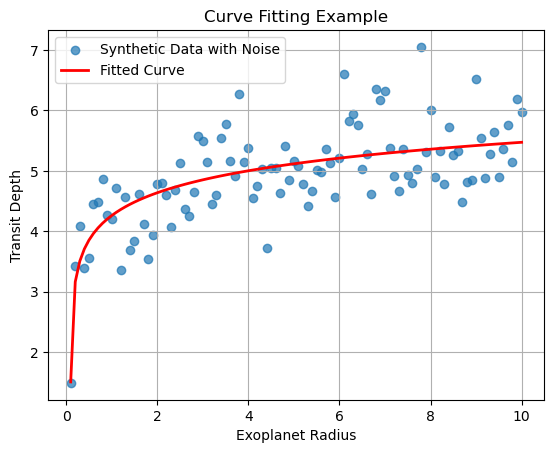

Chi-Squared Statistic: 85.69092779870452
Reduced Chi-Squared: 0.8834116267907682


In [55]:
plt.scatter(x, y, label="Synthetic Data with Noise", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Fitted Curve", lw=2)
plt.legend()
plt.xlabel("Exoplanet Radius")
plt.ylabel("Transit Depth")
plt.title("Curve Fitting Example")
plt.grid(True)
plt.show()
y_pred = ln_model(x, *popt)
residuals = y - y_pred
sigma = .6  
chi_squared = np.sum((residuals / sigma) ** 2)
print(f"Chi-Squared Statistic: {chi_squared}")
degrees_of_freedom = len(x) - len(popt) # divide by degrees of freedom
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"Reduced Chi-Squared: {reduced_chi_squared}")

In [57]:
x = np.linspace(.01, .35, 100)
#(array([ 3.93748092, 59.59135813,  2.54803367]),
true_a, true_b, true_c = 3.937, 59.591, 2.548 
noise = np.random.normal(scale=20, size=x.shape)  
y = exp_growth(x, true_a, true_b, true_c) + noise

popt, pcov = curve_fit(exp_growth, x, y, p0=[1.0, 1.1, 0.5])  # Initial guess
estimated_a, estimated_b, estimated_c = popt
print(f"Estimated Parameters: a={estimated_a}, b={estimated_b}, c={estimated_c}")

Estimated Parameters: a=3.7477146664001153, b=3.563857280158952, c=8.274789181567765


C:\Users\glump\AppData\Local\Temp\ipykernel_23984\1060706162.py:2: RuntimeWarning: invalid value encountered in power
  return a*(b**(x*c))
C:\Users\glump\AppData\Local\Temp\ipykernel_23984\1060706162.py:2: RuntimeWarning: overflow encountered in power
  return a*(b**(x*c))


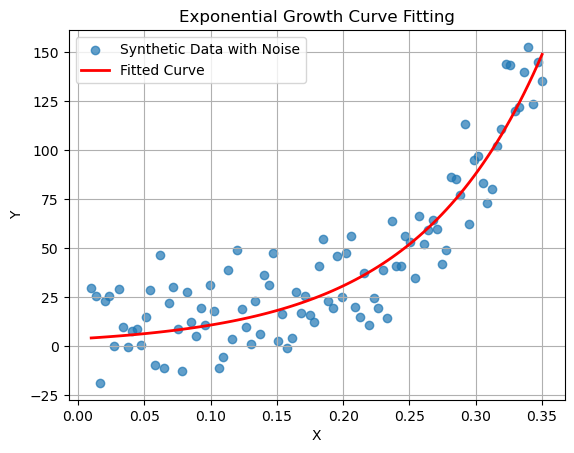

Chi-Squared: 99.62330389070559
Reduced Chi-Squared: 1.027044370007274


In [59]:
y_pred = exp_growth(x, *popt)
residuals = y - y_pred
chi_squared = np.sum((residuals / noise.std()) ** 2)
degrees_of_freedom = len(x) - len(popt)
reduced_chi_squared = chi_squared / degrees_of_freedom
plt.scatter(x, y, label="Synthetic Data with Noise", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Fitted Curve", lw=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Exponential Growth Curve Fitting")
plt.legend()
plt.grid()
plt.show()
print(f"Chi-Squared: {chi_squared}")
print(f"Reduced Chi-Squared: {reduced_chi_squared}")

In [61]:
x = np.linspace(.01, .35, 100)
#(array([1344.56760362,    4.74322183]),
true_a, true_b = 1344.5676, 4.74322
noise = np.random.normal(scale = 300, size = x.shape)
y = exp_decay(x, true_a, true_b) + noise
popt, pcov = curve_fit(exp_decay, x, y, p0 = [1344.5676, 4.74322])
estimated_a, estimated_b = popt
print(f"Estimated Parameters: a={estimated_a}, b={estimated_b}")

Estimated Parameters: a=1333.763697695367, b=4.872769971392899


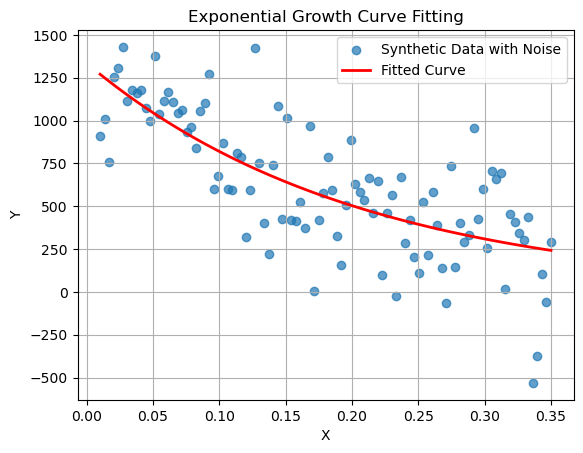

Chi-Squared: 100.06661340367435
Reduced Chi-Squared: 1.021087891874228


In [63]:
y_pred = exp_decay(x, *popt)
residuals = y - y_pred
chi_squared = np.sum((residuals / noise.std()) ** 2)
degrees_of_freedom = len(x) - len(popt)
reduced_chi_squared = chi_squared / degrees_of_freedom
plt.scatter(x, y, label="Synthetic Data with Noise", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Fitted Curve", lw=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Exponential Growth Curve Fitting")
plt.legend()
plt.grid()
plt.show()
print(f"Chi-Squared: {chi_squared}")
print(f"Reduced Chi-Squared: {reduced_chi_squared}")

In [255]:
from musicpy import *

In [112]:
# First equation: .646, -.0023139, 4.109
# .646*np.log(np.maximum(x+.0023139, 1e-10)) + 4.109
# 3 things i can vary (increase...): tempo, key, 
#Log: modulate chromatically, flatten out in a final key (progressive tonality)
# Exponential decay: slow tempo down 
# Exponential growth: stay in key, but pitch increases (like a chromatic scale??)

In [342]:
#Log: Start w/ a Cmaj7 arpeggio, progress up to F
#C4 
a = arp(C('Cmaj7'), 4, 5)
#Eb4
b = arp(C('Ebmaj7'), 4, 5)
#Gb4
c = arp(C('Gbmaj'), 4, 5)

track_a = track(a + b + c, instrument = 1, bpm = 80)

#Ab4
d = arp(C('Abmaj7'), 4, 5)
#Bb4
e = arp(C('Bbmaj7'), 4, 5)
#C5
f = arp(C('Cmaj7'), 5, 6)

track_b = track(d + e + f, instrument = 1, bpm = 70)

#C#5
g = arp(C('C#maj7'), 5, 6)
#D5
h = arp(C('Dmaj7'), 5, 6)
#Eb5
i = arp(C('Ebmaj7'), 5, 6)

track_c = track(g + h + i, instrument = 1, bpm = 60)
#E5
j = arp(C('Emaj7'), 5, 6)
#F5
k = arp(C('Fmaj7'), 5, 6)

track_d = track(j + k, instrument = 1, bpm = 50)
track_e = track(k + k + k + k, instrument = 1, bpm = 45)

play(track_a, wait = True)
play(track_b, wait = True)
play(track_c, wait = True)
play(track_d, wait = True)
play(track_e, wait = True)

In [338]:
#Exponential decay: tempo slows down increasingly

a = arp(C('Adim'), 3, 6)

tempo = 100
for i in range(7):
    play(a, tempo - 2**i, instrument = 17, wait = True)

In [336]:
# Exponential growth: tempo increases
a = arp(C('Adim'), 3, 6)

tempo = 100
for i in range(9):
    play(a, tempo + 2**i, instrument = 2, wait = True)
